In [9]:
pip install pandas pyarrow



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import os

# Dynamically set the working directory to the repository root
#repo_root = os.path.dirname(os.path.abspath(src (source code)/data_processing.ipynb))  # Get the directory of the current file
#os.chdir(repo_root)  # Change to the repository root
#print("Updated Working Directory:", os.getcwd())

# Define input and output folders relative to the repository root
#input_folder = os.path.join(repo_root, "data/raw/AQ_data")
#output_folder = os.path.join(repo_root, "data/raw/AQ_data_CSV")

# Ensure the input folder exists
#if not os.path.exists(input_folder):
    #print(f"Input folder '{input_folder}' does not exist.")
#else:
    # Process files in the input folder
    #for file in os.listdir(input_folder):
        #if file.endswith(".parquet"):
            #df = pd.read_parquet(os.path.join(input_folder, file))
            #csv_filename = file.replace(".parquet", ".csv")
            #os.makedirs(output_folder, exist_ok=True)  # Ensure the output folder exists
            #df.to_csv(os.path.join(output_folder, csv_filename), index=False)

NameError: name '__file__' is not defined

In [10]:
import pandas as pd
import os

input_folder = "/Users/clarabottinelli/Desktop/PQ_downloads"
output_folder = "/Users/clarabottinelli/Desktop/CSV_downloads"

for file in os.listdir(input_folder):
    if file.endswith(".parquet"):
        df = pd.read_parquet(os.path.join(input_folder, file))
        csv_filename = file.replace(".parquet", ".csv")
        df.to_csv(os.path.join(output_folder, csv_filename), index=False)


In [29]:
import pandas as pd
import os

# Initialize an empty dictionary to store dataframes by Samplingpoint
samplingpoint_data = {}

# Iterate through all CSV files in the output folder
for csv_file in os.listdir(output_folder):
    if csv_file.endswith(".csv"):
        file_path = os.path.join(output_folder, csv_file)
        df = pd.read_csv(file_path)
        
        # Group dataframes by Samplingpoint
        for samplingpoint, group in df.groupby("Samplingpoint"):
            if samplingpoint not in samplingpoint_data:
                samplingpoint_data[samplingpoint] = group
            else:
                samplingpoint_data[samplingpoint] = pd.concat([samplingpoint_data[samplingpoint], group], ignore_index=True)

# Merge all dataframes for each Samplingpoint
merged_data = pd.concat(samplingpoint_data.values(), ignore_index=True)

print(merged_data)

                     Samplingpoint  Pollutant                Start  \
0           NO/SPO_NO0073A_38_1785         38  2019-01-01 00:00:00   
1           NO/SPO_NO0073A_38_1785         38  2019-01-01 01:00:00   
2           NO/SPO_NO0073A_38_1785         38  2019-01-01 02:00:00   
3           NO/SPO_NO0073A_38_1785         38  2019-01-01 03:00:00   
4           NO/SPO_NO0073A_38_1785         38  2019-01-01 04:00:00   
...                            ...        ...                  ...   
14847174  NL/SPO-NL00003_00009_101          9  2023-12-31 19:00:00   
14847175  NL/SPO-NL00003_00009_101          9  2023-12-31 20:00:00   
14847176  NL/SPO-NL00003_00009_101          9  2023-12-31 21:00:00   
14847177  NL/SPO-NL00003_00009_101          9  2023-12-31 22:00:00   
14847178  NL/SPO-NL00003_00009_101          9  2023-12-31 23:00:00   

                          End      Value    Unit AggType  Validity  \
0         2019-01-01 01:00:00 -9900.0000  ug.m-3    hour        -1   
1         2019-01-0

In [30]:
print(merged_data['Pollutant'].unique())

[  38    8    7    5 6001    9]


In [45]:
# Create a dictionary for pollutant codes
pollutant_codes = {
    5: "NO",
    7: "CO2",
    8: "NO2",
    9: "PM2.5",
    38: "PM10",
    6001: "NOX as NO2"
}

# Add a new column 'Notation' to merged_data based on the Pollutant column
merged_data['Notation'] = merged_data['Pollutant'].map(pollutant_codes)

merged_data

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,Year,Notation
0,NO/SPO_NO0073A_38_1785,38,2019-01-01 00:00:00,2019-01-01 01:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,2019.0,PM10
1,NO/SPO_NO0073A_38_1785,38,2019-01-01 01:00:00,2019-01-01 02:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,2019.0,PM10
2,NO/SPO_NO0073A_38_1785,38,2019-01-01 02:00:00,2019-01-01 03:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,2019.0,PM10
3,NO/SPO_NO0073A_38_1785,38,2019-01-01 03:00:00,2019-01-01 04:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,2019.0,PM10
4,NO/SPO_NO0073A_38_1785,38,2019-01-01 04:00:00,2019-01-01 05:00:00,-9900.0000,ug.m-3,hour,-1,1,2020-09-29 11:41:48,NaN,0fc404b0-e3c3-4118-bb62-c80ccfbb99a4,2019.0,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847174,NL/SPO-NL00003_00009_101,9,2023-12-31 19:00:00,2023-12-31 20:00:00,5.4933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,2023.0,PM2.5
14847175,NL/SPO-NL00003_00009_101,9,2023-12-31 20:00:00,2023-12-31 21:00:00,4.9933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,2023.0,PM2.5
14847176,NL/SPO-NL00003_00009_101,9,2023-12-31 21:00:00,2023-12-31 22:00:00,5.6933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,2023.0,PM2.5
14847177,NL/SPO-NL00003_00009_101,9,2023-12-31 22:00:00,2023-12-31 23:00:00,5.3933,ug.m-3,hour,1,1,2024-12-11 14:58:11,NaN,ace1e0cc-9206-461d-a4b3-c9b0085599bd,2023.0,PM2.5


In [46]:
# Ensure the 'Start' column is in datetime format
merged_data['End'] = pd.to_datetime(merged_data['End'], errors='coerce', infer_datetime_format=True)

# Check for rows that could not be converted
if merged_data['End'].isna().any():
    print("Warning: Some rows in the 'End' column could not be converted to datetime.")
    print(merged_data[merged_data['Start'].isna()])

# Add a 'Year' column based on the 'End' column
merged_data['Year'] = merged_data['End'].dt.year

print(merged_data[['End', 'Year']].head())

/var/folders/c8/hcty8r1j2xj189pdz208fpnr0000gn/T/ipykernel_78584/2315408751.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  merged_data['End'] = pd.to_datetime(merged_data['End'], errors='coerce', infer_datetime_format=True)


Empty DataFrame
Columns: [Samplingpoint, Pollutant, Start, End, Value, Unit, AggType, Validity, Verification, ResultTime, DataCapture, FkObservationLog, Year, Notation]
Index: []
                  End    Year
0 2019-01-01 01:00:00  2019.0
1 2019-01-01 02:00:00  2019.0
2 2019-01-01 03:00:00  2019.0
3 2019-01-01 04:00:00  2019.0
4 2019-01-01 05:00:00  2019.0


In [47]:
nan_in_end = merged_data['End'].isna().sum()
nan_in_start = merged_data['Start'].isna().sum()

print(f"Number of NaNs in 'End' column: {nan_in_end}")
print(f"Number of NaNs in 'Start' column: {nan_in_start}")

Number of NaNs in 'End' column: 78090
Number of NaNs in 'Start' column: 0


In [48]:
print(merged_data['AggType'].unique())

['hour' 'day']


In [50]:
# Create a copy of merged_data
AQ_yearly_values = merged_data.copy()

# Group by Samplingpoint, Pollutant, and Year, then calculate the mean of Value
AQ_yearly_values = AQ_yearly_values.groupby(['Samplingpoint', 'Pollutant', 'Year', 'Notation'])['Value'].mean().reset_index()

print(AQ_yearly_values.head())

             Samplingpoint  Pollutant    Year Notation      Value
0  AT/SPO.09.A23.65511.8.1          8  2014.0      NO2  34.601802
1  AT/SPO.09.A23.65511.8.1          8  2015.0      NO2  34.825077
2  AT/SPO.09.A23.65511.8.1          8  2016.0      NO2  33.344638
3  AT/SPO.09.A23.65511.8.1          8  2017.0      NO2  33.461052
4  AT/SPO.09.A23.65511.8.1          8  2018.0      NO2  32.569963


In [51]:
#summary of the AQ_yearly_values dataframe
print("DataFrame Summary:")
print(AQ_yearly_values.info())

print("\nFirst 5 Rows:")
print(AQ_yearly_values.head())

print("\nDescriptive Statistics:")
print(AQ_yearly_values.describe(include='all'))

print("\nUnique Samplingpoints:")
print(AQ_yearly_values['Samplingpoint'].nunique())

print("\nUnique Pollutants:")
print(AQ_yearly_values['Pollutant'].unique())

print("\nYear Range:")
print(f"{AQ_yearly_values['Year'].min()} to {AQ_yearly_values['Year'].max()}")

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Samplingpoint  1925 non-null   object 
 1   Pollutant      1925 non-null   int64  
 2   Year           1925 non-null   float64
 3   Notation       1925 non-null   object 
 4   Value          1925 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 75.3+ KB
None

First 5 Rows:
             Samplingpoint  Pollutant    Year Notation      Value
0  AT/SPO.09.A23.65511.8.1          8  2014.0      NO2  34.601802
1  AT/SPO.09.A23.65511.8.1          8  2015.0      NO2  34.825077
2  AT/SPO.09.A23.65511.8.1          8  2016.0      NO2  33.344638
3  AT/SPO.09.A23.65511.8.1          8  2017.0      NO2  33.461052
4  AT/SPO.09.A23.65511.8.1          8  2018.0      NO2  32.569963

Descriptive Statistics:
                 Samplingpoint    Pollutant         Year Notati

In [39]:
hour_count = merged_data[merged_data['AggType'] == 'hour'].shape[0]
day_count = merged_data[merged_data['AggType'] == 'day'].shape[0]

print(f"Number of 'hour': {hour_count}")
print(f"Number of 'day': {day_count}")

Number of 'hour': 14769089
Number of 'day': 78090


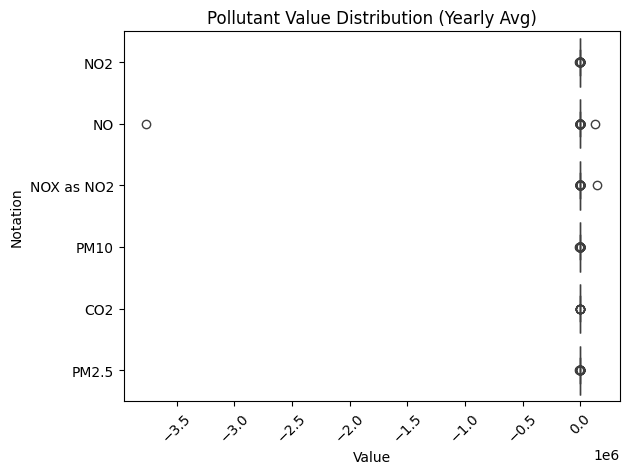

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution per pollutant
sns.boxplot(data=AQ_yearly_values, x="Value", y="Notation",)
plt.xticks(rotation=45)
plt.title("Pollutant Value Distribution (Yearly Avg)")
plt.show()


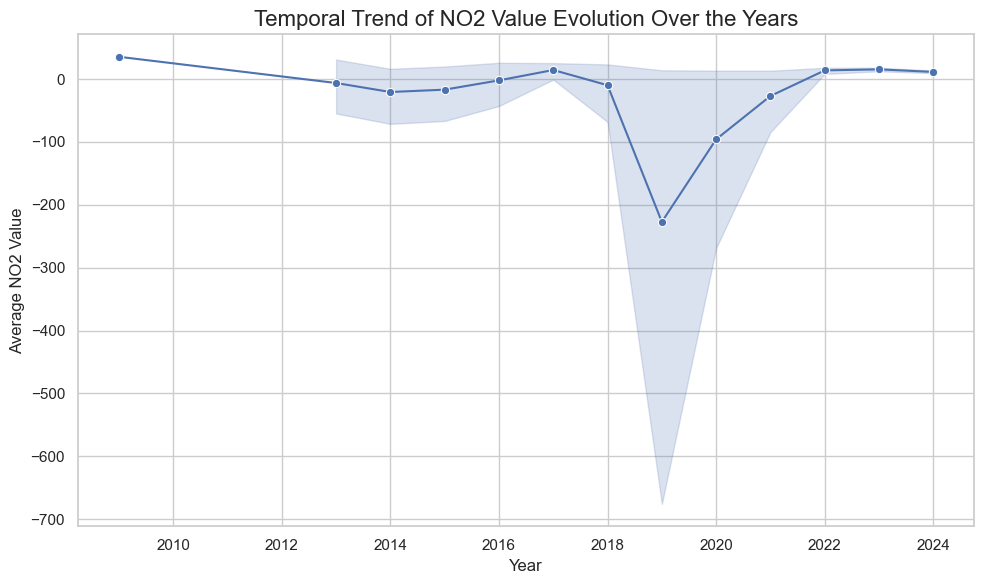

In [62]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the dataframe for NO2
no2_data = AQ_yearly_values[AQ_yearly_values['Notation'] == 'NO2']

# Plot the temporal trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=no2_data, x='Year', y='Value', marker='o')

# Add labels and title
plt.title('Temporal Trend of NO2 Value Evolution Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average NO2 Value', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

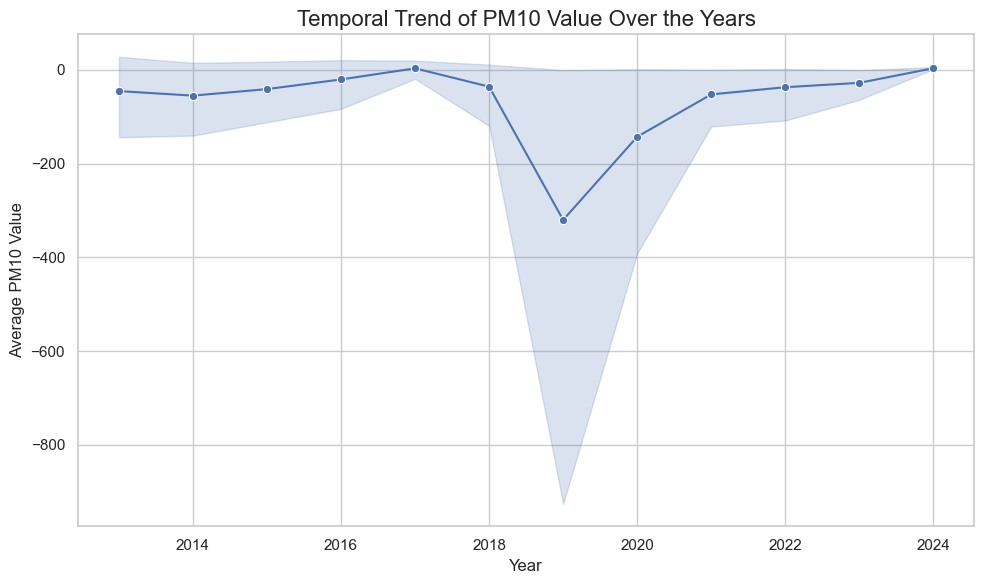

In [63]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the dataframe for PM10
pm10_data = AQ_yearly_values[AQ_yearly_values['Notation'] == 'PM10']

# Plot the temporal trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=pm10_data, x='Year', y='Value', marker='o')

# Add labels and title
plt.title('Temporal Trend of PM10 Value Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average PM10 Value', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

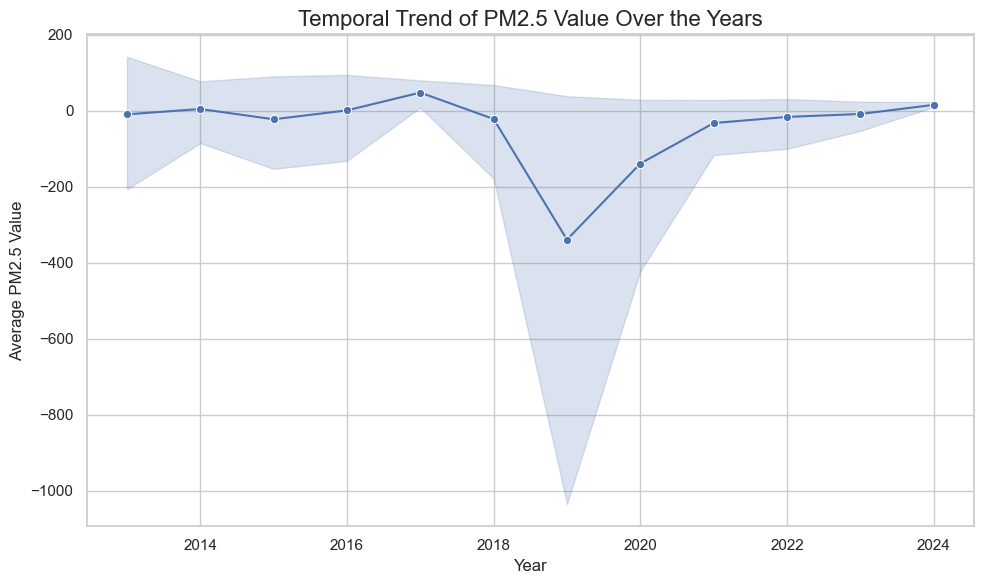

In [64]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the dataframe for PM2.5
pm25_data = AQ_yearly_values[AQ_yearly_values['Notation'] == 'PM2.5']

# Plot the temporal trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=pm25_data, x='Year', y='Value', marker='o')

# Add labels and title
plt.title('Temporal Trend of PM2.5 Value Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average PM2.5 Value', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

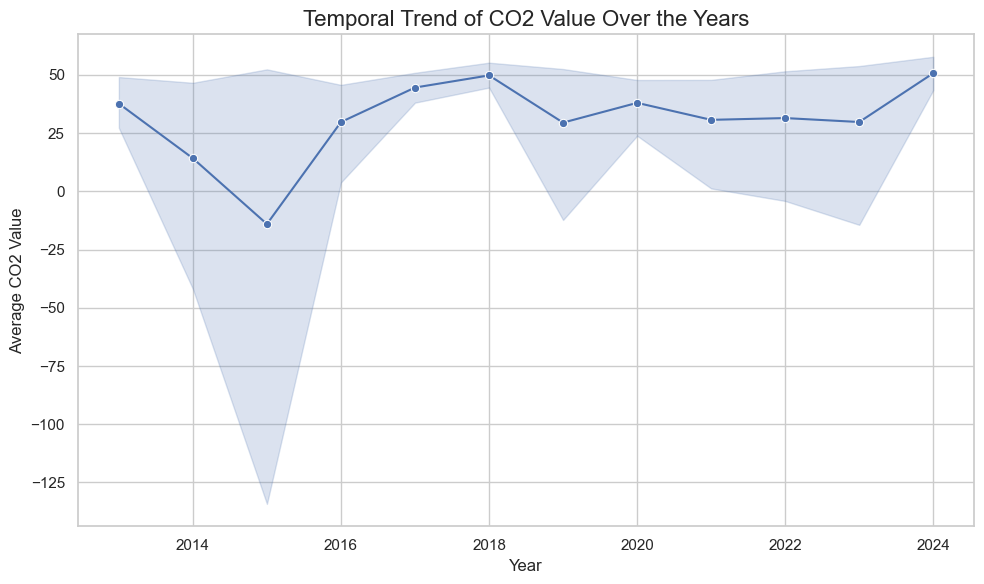

In [65]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the dataframe for CO2
co2_data = AQ_yearly_values[AQ_yearly_values['Notation'] == 'CO2']

# Plot the temporal trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=co2_data, x='Year', y='Value', marker='o')

# Add labels and title
plt.title('Temporal Trend of CO2 Value Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average CO2 Value', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

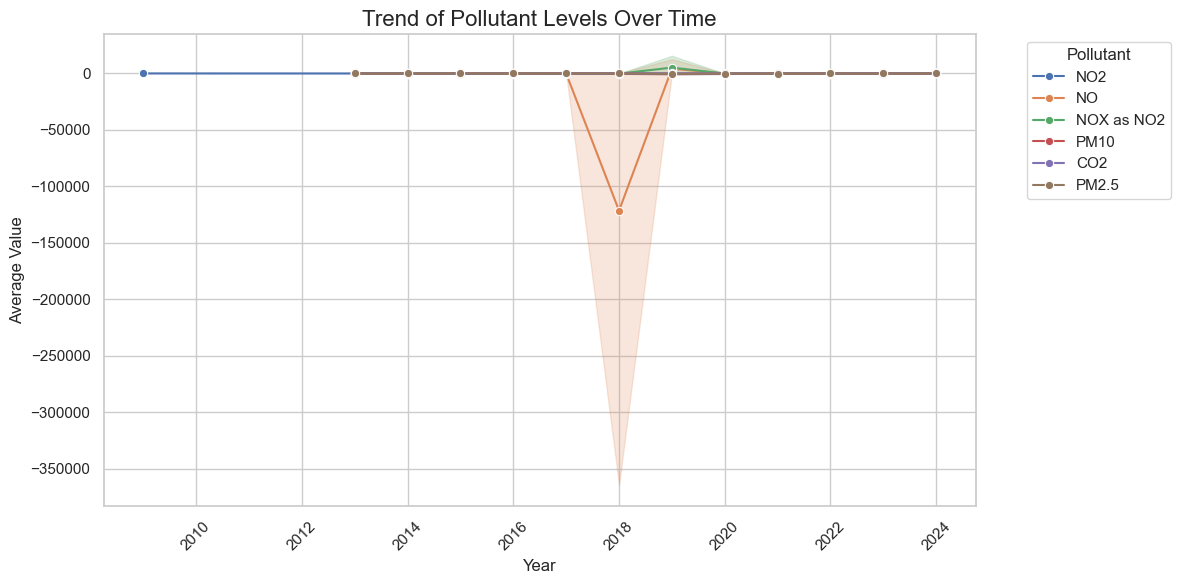

In [58]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a line plot for the evolution of the trend over time for each pollutant
plt.figure(figsize=(12, 6))
sns.lineplot(data=AQ_yearly_values, x="Year", y="Value", hue="Notation", marker="o")

# Add labels and title
plt.title("Trend of Pollutant Levels Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend(title="Pollutant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
import requests
import time
from datetime import datetime

# API endpoint and payload
api_url = "https://eeadmz1-downloads-api-appservice.azurewebsites.net/"
endpoint = "ParquetFile/async"

# Define the request
request_body = {
    "countries": ["NO"],
    "cities": ["Oslo"],
    "pollutants": ["CO2", "NO", "NO2", "NOX as NO2", "PM2.5", "PM10", "O3"],
    "dataset": 2,
    "dateTimeStart": "2023-01-01T00:00:00Z",
    "dateTimeEnd": "2023-12-31T23:59:59Z",
    "aggregationType": "day",
    "email": "clara.bottinelli@epfl.ch"
}

# Send request to start the download
response = requests.post(api_url + endpoint, json=request_body)
download_url = response.text.strip().strip('"')  # URL where file will become available

# Poll the URL until the file is ready
print("Waiting for file to be generated...")
while True:
    check = requests.get(download_url)
    if check.status_code == 200:
        break
    time.sleep(20)

# Save to home directory (writable in all environments)
home_dir = os.path.expanduser("~")
file_path = os.path.join(home_dir, "EEA_air_quality_data.zip")

# Save the downloaded file
with open(file_path, "wb") as f:
    f.write(check.content)

print(f"✅ Download complete: {file_path}")

Waiting for file to be generated...
✅ Download complete: /Users/clarabottinelli/EEA_air_quality_data.zip


In [ ]:
import requests
import time
from datetime import datetime

# API endpoint and payload
api_url = "https://eeadmz1-downloads-api-appservice.azurewebsites.net/"
endpoint = "ParquetFile/async"

# Define the request
request_body = {
    "countries": ["CH", "NO", "DK", "NL", "AT", "SE"],
    "cities": ["Zürich (greater city)", "Oslo", "København", "Amsterdam", "Wien", "Stockholm"],
    "pollutants": ["CO2", "NO", "NO2", "NOX as NO2", "PM2.5", "PM10", "O3"],
    "dataset": 2,
    "dateTimeStart": "2023-01-01T00:00:00Z",
    "dateTimeEnd": "2023-12-31T23:59:59Z",
    "aggregationType": "day",
    "email": "clara.bottinelli@epfl.ch"
}

# Send request to start the download
response = requests.post(api_url + endpoint, json=request_body)
download_url = response.text.strip().strip('"')  # URL where file will become available

# Poll the URL until the file is ready
print("Waiting for file to be generated...")
while True:
    check = requests.get(download_url)
    if check.status_code == 200:
        break
    time.sleep(20)

# Download the file
file_name = "EEA_air_quality_data.zip"
with open(file_name, "wb") as f:
    f.write(check.content)

print("Download complete.")


Waiting for file to be generated...


InvalidSchema: No connection adapters were found for 'Not valid cities for the selected country/countries: Bern, Amsterdam, Stockholm.'

In [5]:
print(df['Pollutant'].unique())

[8]


In [18]:
df = pd.read_parquet('/Users/clarabottinelli/Downloads/SPO-SE344250_00005_100.parquet')
print(df.head())

               Samplingpoint  Pollutant      Start        End  \
0  SE/SPO-SE344250_00005_100          5 2024-01-01 2024-01-02   
1  SE/SPO-SE344250_00005_100          5 2024-01-02 2024-01-03   
2  SE/SPO-SE344250_00005_100          5 2024-01-03 2024-01-04   
3  SE/SPO-SE344250_00005_100          5 2024-01-04 2024-01-05   
4  SE/SPO-SE344250_00005_100          5 2024-01-05 2024-01-06   

                   Value    Unit AggType  Validity  Verification  \
0  10.500000000000000000  ug.m-3     day         1             1   
1  12.200000000000000000  ug.m-3     day         1             1   
2   3.900000000000000000  ug.m-3     day         1             1   
3   8.700000000000000000  ug.m-3     day         1             1   
4   8.200000000000000000  ug.m-3     day         1             1   

               ResultTime DataCapture                      FkObservationLog  
0 2025-03-27 15:56:32.496        None  161355ae-25e4-4005-8d62-b0fcf396599d  
1 2025-03-27 15:56:32.496        None  16135

In [20]:
print(df['Samplingpoint'].unique())

['SE/SPO-SE344250_00005_100']


In [19]:
print(len(df))

470


In [7]:
df = pd.read_parquet('/Users/clarabottinelli/Downloads/E1a 2/SPO-CH0005A_00005_100.parquet')
print(df.head())

              Samplingpoint  Pollutant      Start        End  \
0  CH/SPO-CH0005A_00005_100          5 2013-10-30 2013-10-31   
1  CH/SPO-CH0005A_00005_100          5 2013-10-31 2013-11-01   
2  CH/SPO-CH0005A_00005_100          5 2013-11-01 2013-11-02   
3  CH/SPO-CH0005A_00005_100          5 2013-11-03 2013-11-04   
4  CH/SPO-CH0005A_00005_100          5 2013-11-04 2013-11-05   

                   Value    Unit AggType  Validity  Verification  \
0  11.900000000000000000  ug.m-3     day         1             1   
1  23.400000000000000000  ug.m-3     day         1             1   
2  33.500000000000000000  ug.m-3     day         1             1   
3   1.000000000000000000  ug.m-3     day         1             1   
4   2.100000000000000000  ug.m-3     day         1             1   

           ResultTime DataCapture                      FkObservationLog  
0 2014-09-16 10:45:03        None  4c019e66-1b60-4e99-82fb-dd6f55fcad19  
1 2014-09-16 10:45:03        None  4c019e66-1b60-4e99-82fb